In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Предполагаем, что данные находятся в CSV файле
url = 'people_data.csv'
data = pd.read_csv(url)

In [ ]:
data.info()
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   FIO       36 non-null     object 
 1   Age       36 non-null     int64  
 2   Gender    36 non-null     object 
 3   Task      36 non-null     object 
 4   Error     36 non-null     int64  
 5   Time      36 non-null     float64
 6   Question  36 non-null     int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 2.1+ KB


FIO         0
Age         0
Gender      0
Task        0
Error       0
Time        0
Question    0
dtype: int64

In [ ]:
print(data)

                               FIO  Age Gender   Task  Error     Time  \
0        Наумова Евгения Ильинична   22      Ж  Task1      0    7.699   
1        Наумова Евгения Ильинична   22      Ж  Task2      1   44.106   
2        Наумова Евгения Ильинична   22      Ж  Task3      2  171.851   
3        Наумова Евгения Ильинична   22      Ж  Task4      0   40.665   
4        Наумова Евгения Ильинична   22      Ж  Task5      0   22.966   
5        Наумова Евгения Ильинична   22      Ж  Task6      0   30.334   
6        Онкуров Мингиян Баатрович   21      М  Task1      0   15.059   
7        Онкуров Мингиян Баатрович   21      М  Task2      2   43.406   
8        Онкуров Мингиян Баатрович   21      М  Task3      7  215.558   
9        Онкуров Мингиян Баатрович   21      М  Task4      9   78.836   
10       Онкуров Мингиян Баатрович   21      М  Task5      4   17.270   
11       Онкуров Мингиян Баатрович   21      М  Task6      7  299.582   
12   Андреев Александр Григорьевич   22      М  Tas

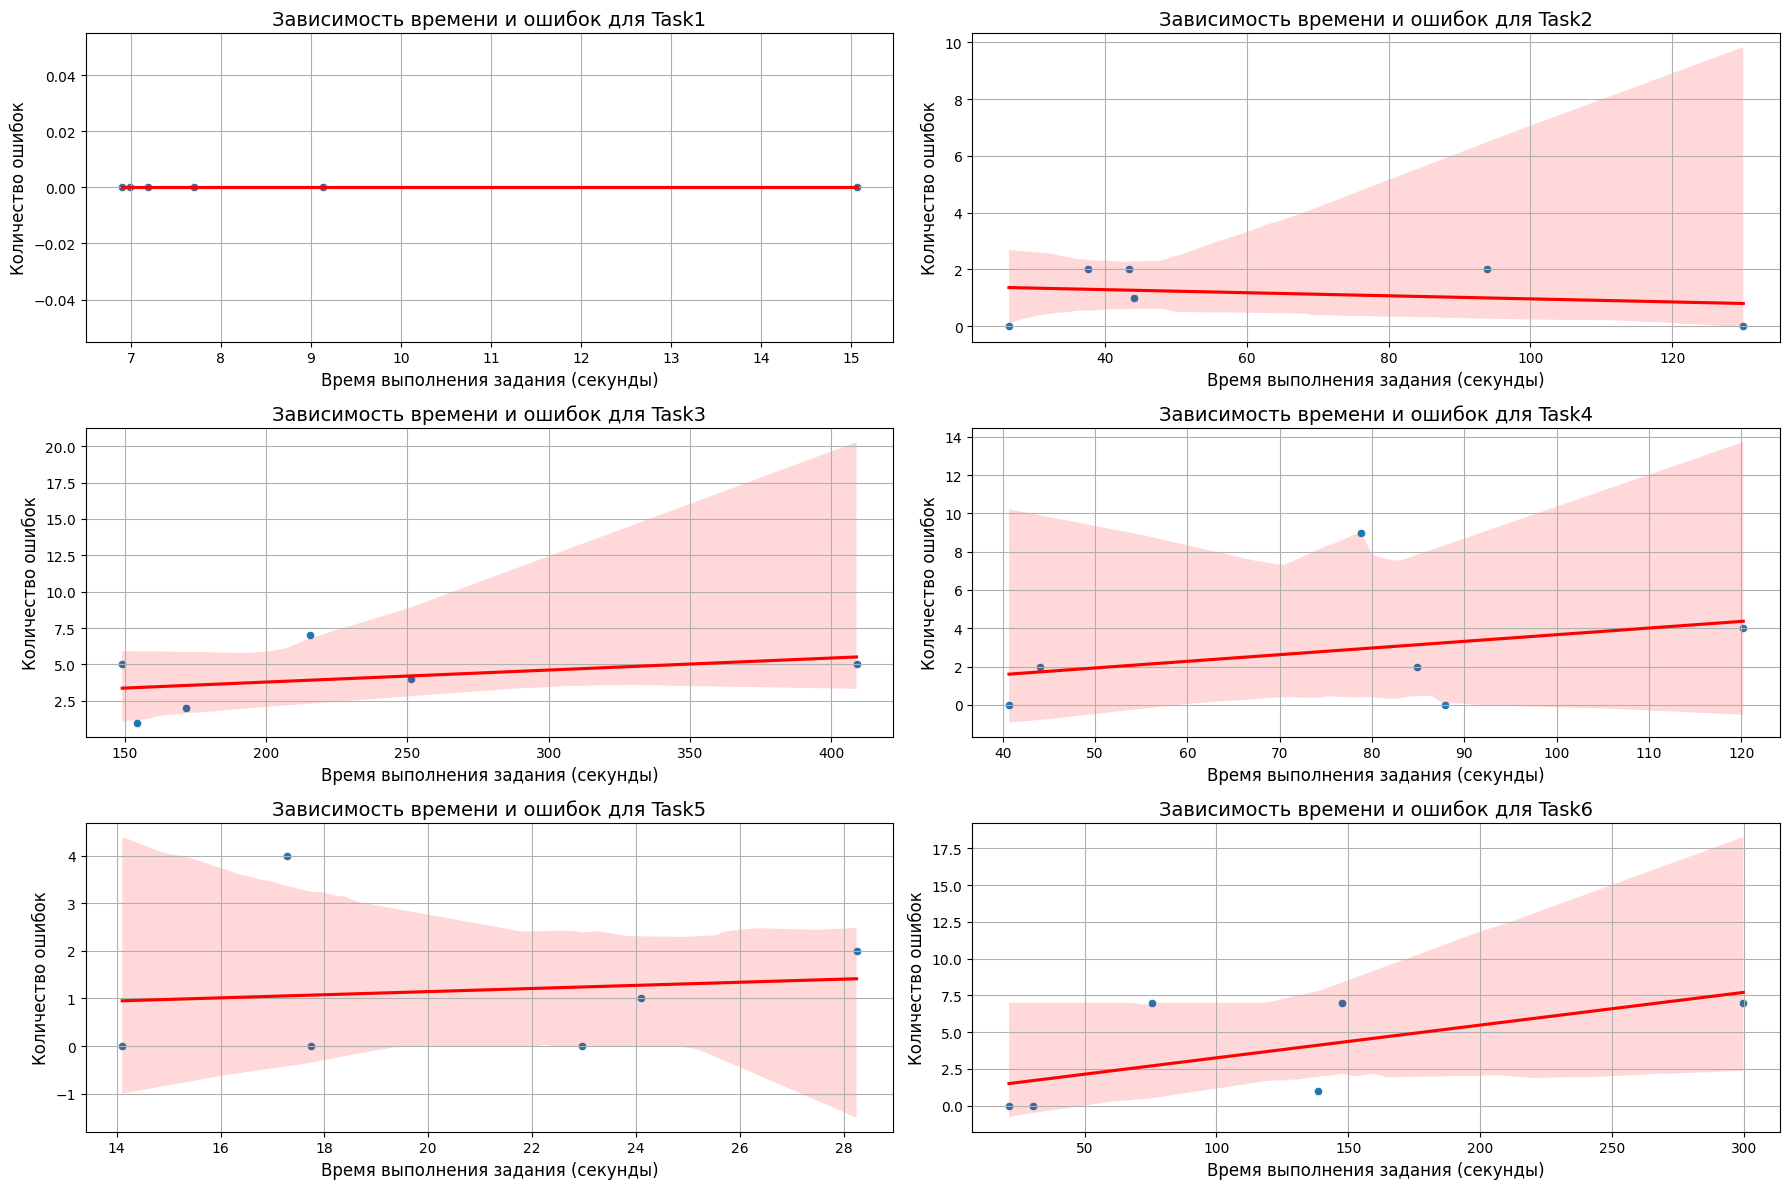

In [ ]:
plt.figure(figsize=(18, 12))

# Уникальные задачи
tasks = data['Task'].unique()

# Построение графиков рассеяния с линиями тренда
for i, task in enumerate(tasks):
    plt.subplot(3, 2, i+1)
    task_data = data[data['Task'] == task]
    sns.scatterplot(x='Time', y='Error', data=task_data)
    sns.regplot(x='Time', y='Error', data=task_data, scatter=False, color='red') # Линия тренда
    plt.title(f'Зависимость времени и ошибок для {task}', fontsize=14)
    plt.xlabel('Время выполнения задания (секунды)', fontsize=12)
    plt.ylabel('Количество ошибок', fontsize=12)
    plt.grid(True)

plt.tight_layout()
plt.show()

Посмотрим на зависимость ответа на вопрос и количества ошибок.

In [ ]:
avg_errors = data.groupby('Question')['Error'].mean()
avg_errors

Question
0    1.969697
1    4.000000
Name: Error, dtype: float64

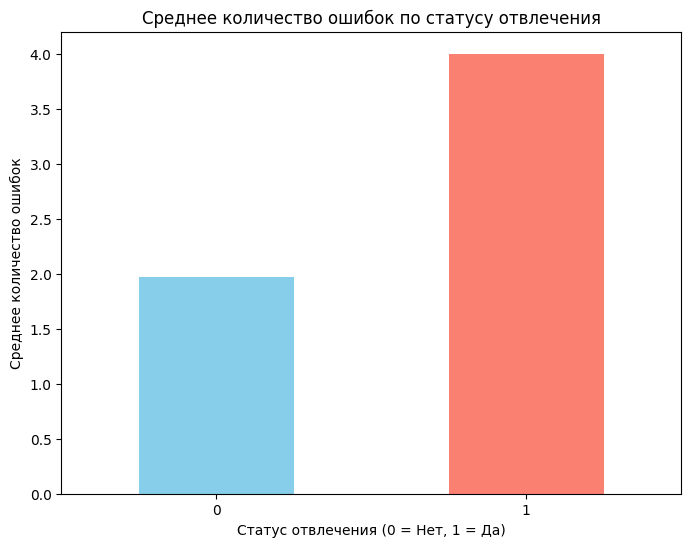

In [ ]:
plt.figure(figsize=(8, 6))
avg_errors.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Среднее количество ошибок по статусу отвлечения')
plt.xlabel('Статус отвлечения (0 = Нет, 1 = Да)')
plt.ylabel('Среднее количество ошибок')
plt.xticks(rotation=0)
plt.show()

Теперь посмотрим на зависимсоть ответа на вопрос и потраченное на задачу время

In [ ]:
avg_time = data.groupby('Question')['Time'].mean()
avg_time

Question
0     75.352758
1    195.527667
Name: Time, dtype: float64

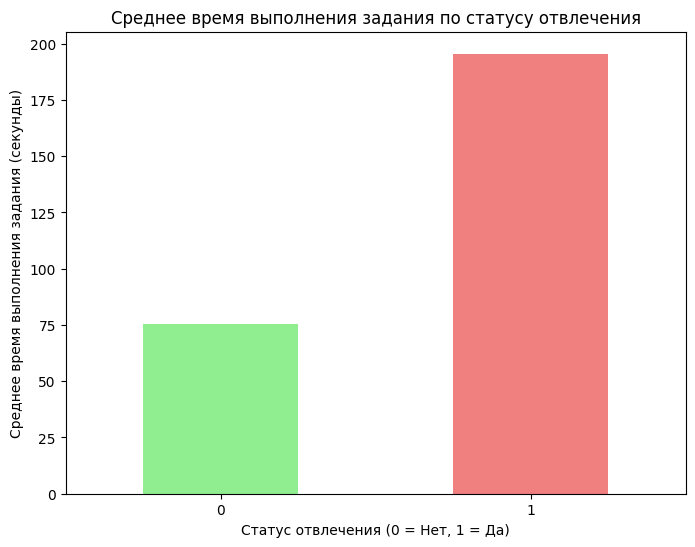

In [ ]:
# Plotting the average time for each group with labels in Russian
plt.figure(figsize=(8, 6))
avg_time.plot(kind='bar', color=['lightgreen', 'lightcoral'])
plt.title('Среднее время выполнения задания по статусу отвлечения')
plt.xlabel('Статус отвлечения (0 = Нет, 1 = Да)')
plt.ylabel('Среднее время выполнения задания (секунды)')
plt.xticks(rotation=0)
plt.show()

Теперь введём некоторую оценочную функцию для расчёта усточивости к прокрастинации

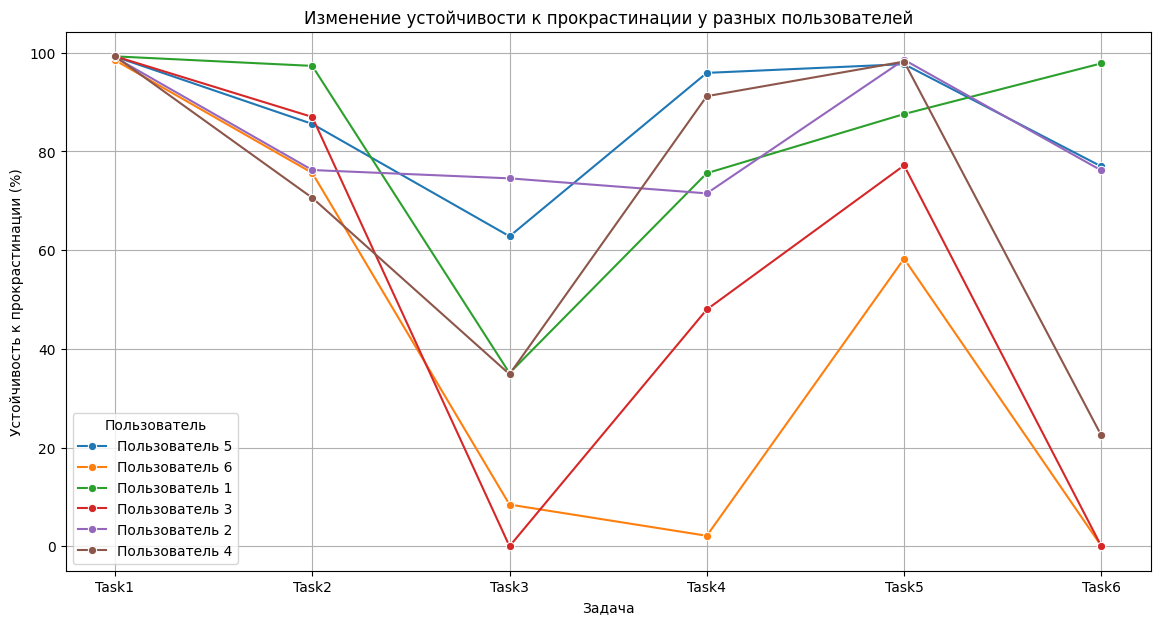

In [ ]:
def calculate_procrastination_score(row):
    time = row['Time']
    errors = row['Error']
    question = row['Question']
    # Простой способ расчёта: меньше времени и ошибок - выше балл
    score = max(0, 100 - (time * 0.1 + errors * 10 + question * 20))
    return score

data['Procrastination Score'] = data.apply(calculate_procrastination_score, axis=1)

data['User'] = 'Пользователь ' + (data.groupby('FIO').ngroup() + 1).astype(str)

plt.figure(figsize=(14, 7))
sns.lineplot(x='Task', y='Procrastination Score', hue='User', data=data, marker='o')
plt.title('Изменение устойчивости к прокрастинации у разных пользователей')
plt.xlabel('Задача')
plt.ylabel('Устойчивость к прокрастинации (%)')
plt.legend(title='Пользователь')
plt.grid(True)
plt.show()

Можем посмотреть изменения для каждого пользователя по отдельности.

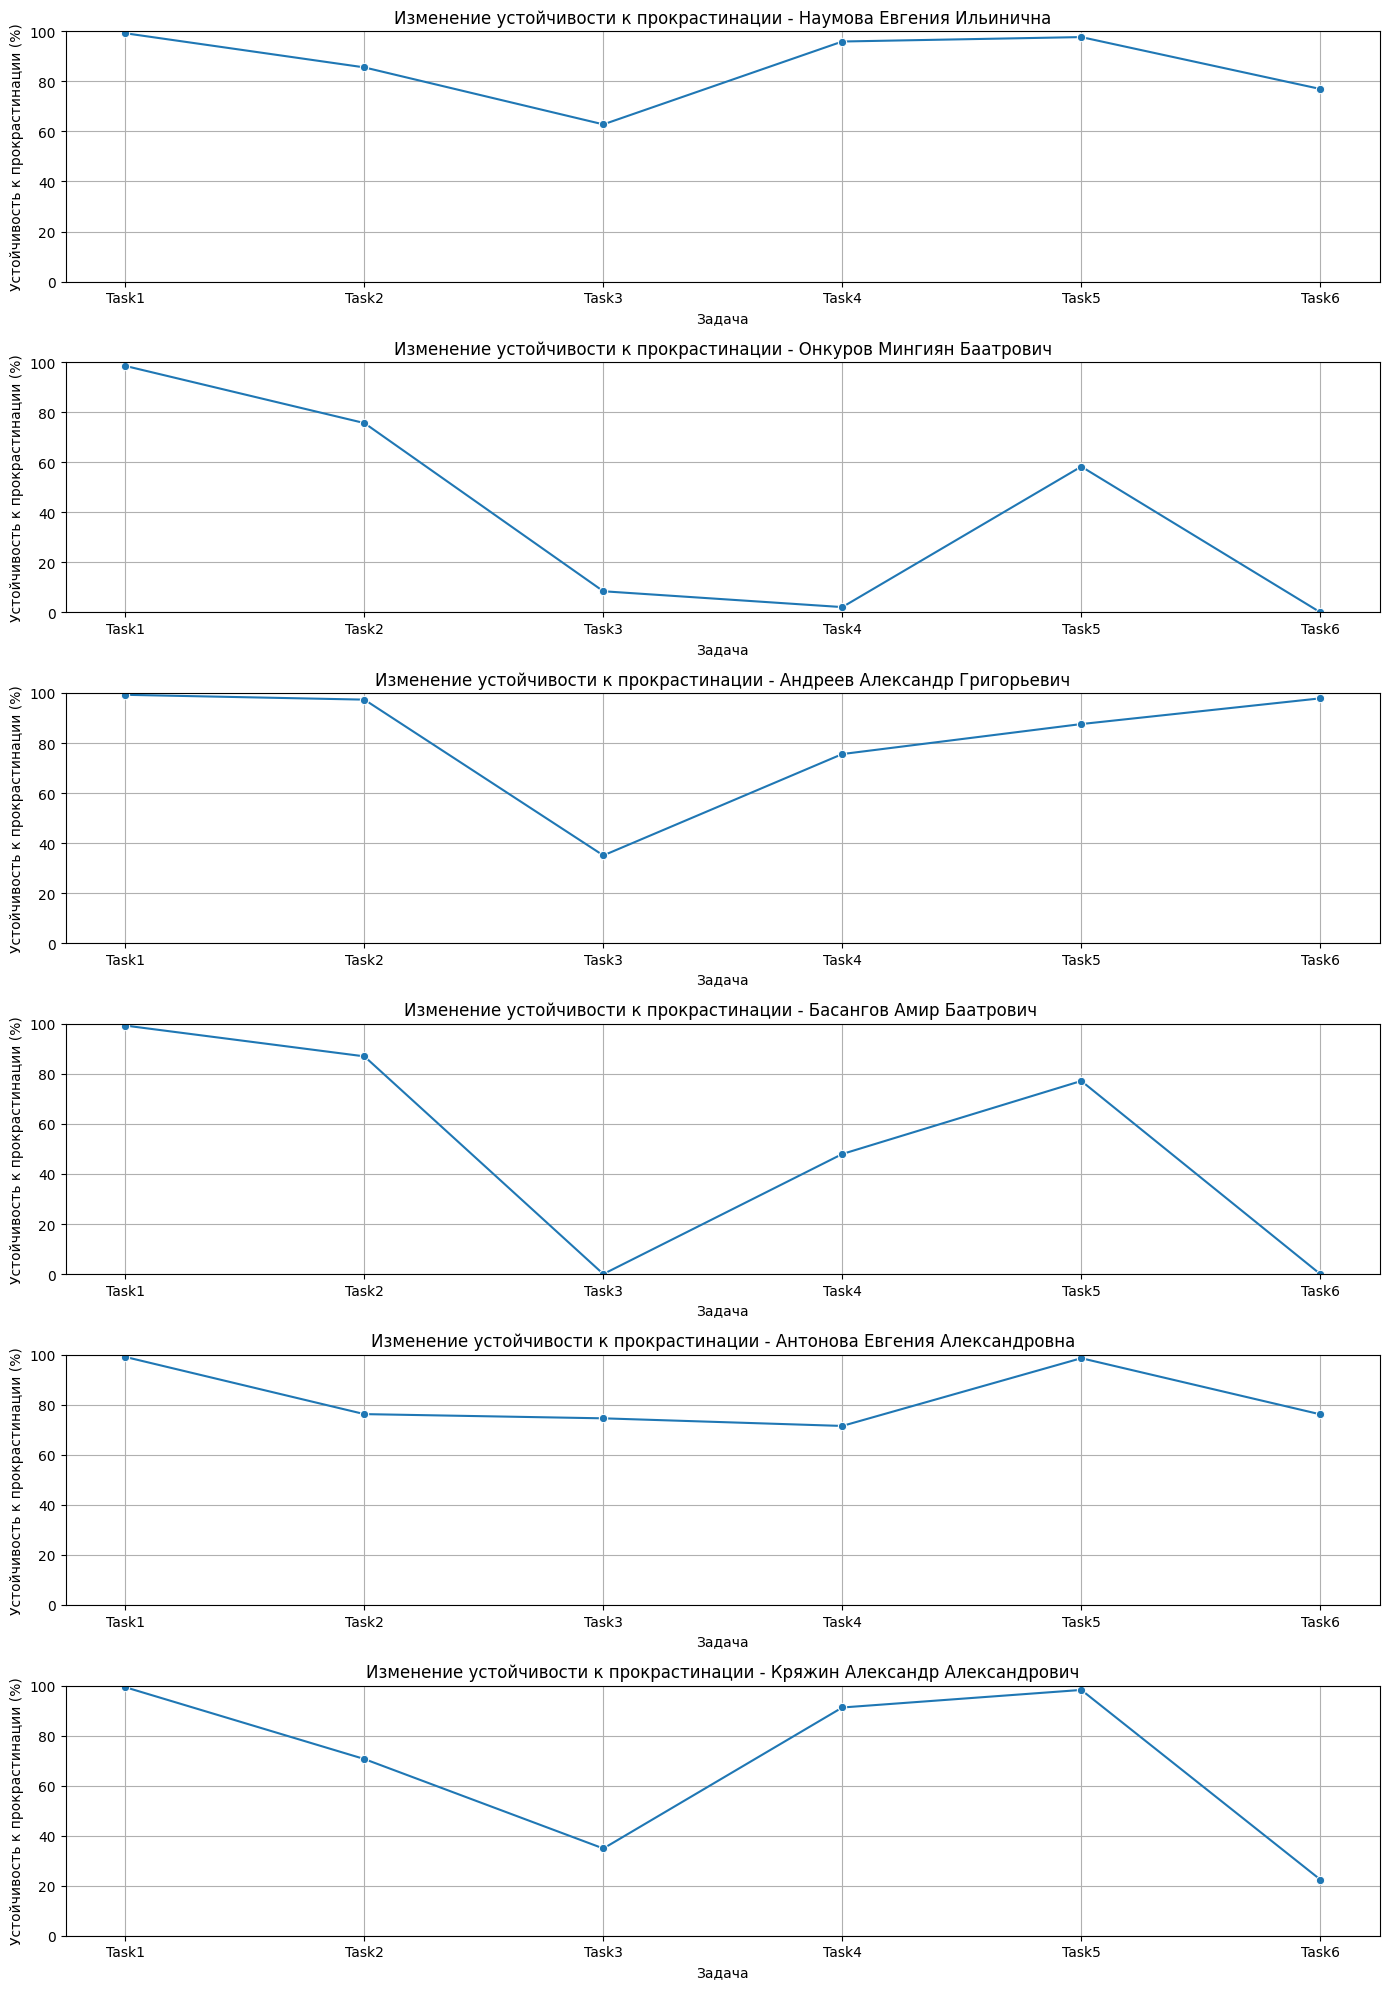

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

users = data['FIO'].unique()
plt.figure(figsize=(14, 20))

for i, user in enumerate(users):
    plt.subplot(len(users), 1, i+1)
    user_data = data[data['FIO'] == user]
    sns.lineplot(x='Task', y='Procrastination Score', data=user_data, marker='o')
    plt.title(f'Изменение устойчивости к прокрастинации - {user}')
    plt.xlabel('Задача')
    plt.ylabel('Устойчивость к прокрастинации (%)')
    plt.ylim(0, 100)
    plt.grid(True)

plt.tight_layout()
plt.show()

Посмотрим на зависимость ошибок и устойчивости к прокрастинации.

In [ ]:
# Группировка данных по количеству ошибок и расчет среднего значения устойчивости к прокрастинации
error_groups = data.groupby('Time')['Procrastination Score'].mean().reset_index()

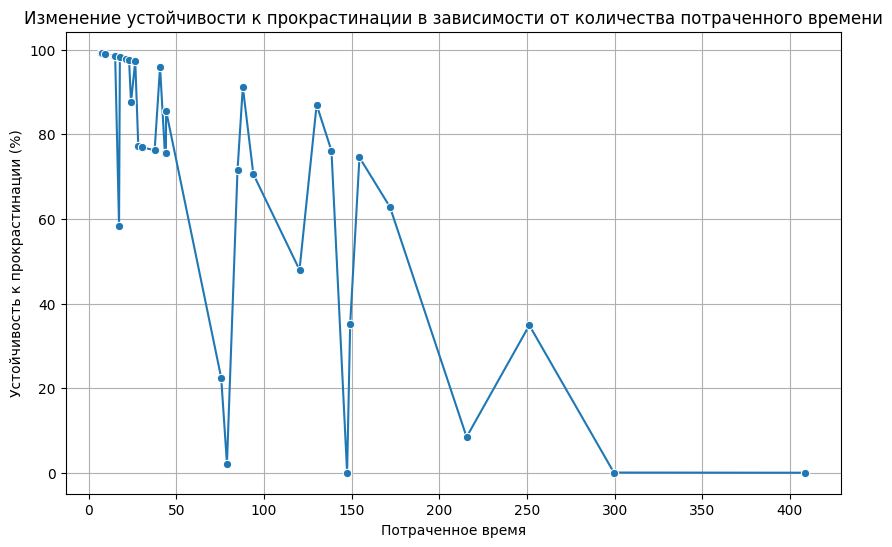

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.lineplot(x='Time', y='Procrastination Score', data=error_groups, marker='o')
plt.title('Изменение устойчивости к прокрастинации в зависимости от количества потраченного времени')
plt.xlabel('Потраченное время')
plt.ylabel('Устойчивость к прокрастинации (%)')
plt.grid(True)
plt.show()